In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_circuit_orig = pd.read_csv("outputs/df_circuit.csv")
df_Loads_orig = df_circuit_orig[df_circuit_orig["type"] == "load"].reset_index(drop=True)
df_Loads_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   idx         15 non-null     int64  
 1   type        15 non-null     object 
 2   name        15 non-null     object 
 3   nodes       0 non-null      float64
 4   kv          15 non-null     float64
 5   volts       15 non-null     object 
 6   puvolts     0 non-null      object 
 7   voltsabs    15 non-null     object 
 8   puvoltsabs  0 non-null      object 
 9   x           15 non-null     float64
 10  y           15 non-null     float64
 11  distance    15 non-null     float64
 12  phases      15 non-null     float64
 13  kw          15 non-null     float64
 14  kvar        15 non-null     float64
 15  current     15 non-null     object 
 16  power       15 non-null     object 
 17  currentabs  15 non-null     object 
 18  powerabs    15 non-null     object 
 19  buses       15 non-null     obj

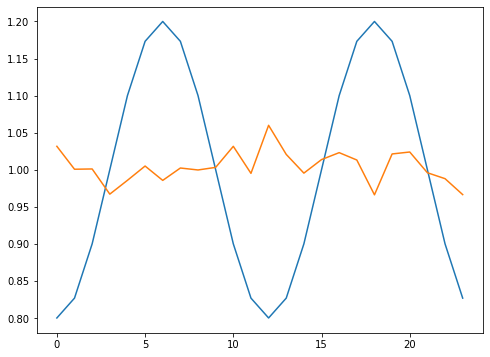

In [3]:
t = np.linspace(0, 23, 24)
y = 0.2*np.sin((t-3)*(2*np.pi)/12) +1 
y_noise = np.random.normal(loc = 0, scale = 0.02, size = t.shape )
fig1 = plt.figure(figsize = (8, 6))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(t,y)
ax1.plot(t,y_noise+1)
# ax1.plot(t, y + y_noise)

,name,kW,kvar,t
count,15,15,15,15
unique,15,15,15,1
top,Load.671,"[919.7614496531529, 955.6511572948538, 1039.26...","[525.5779712303731, 546.0863755970594, 593.866...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
freq,1,1,1,15


,t,kW,kvar
0,0.0,2760.305762,1677.092684
1,1.0,2894.883255,1753.012312
2,2.0,3095.041765,1876.062913
3,3.0,3467.088239,2100.610012
4,4.0,3811.905370,2311.699853


,name,kW,kvar,t
0,Load.671,919.76145,525.577971,0.0
1,Load.671,955.651157,546.086376,1.0
2,Load.671,1039.266517,593.866581,2.0
3,Load.671,1152.305125,658.460072,3.0
4,Load.671,1260.081903,720.046802,4.0


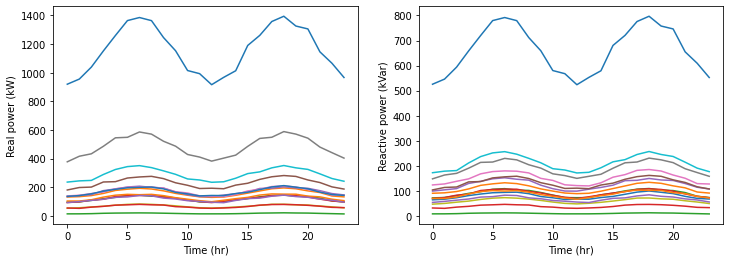

In [18]:
dictLoadsTS = {"name": [],
               "kW": [],
               "kvar": [],
               "t": [],
              }

t = np.linspace(0, 23, 24)
y = 0.2*np.sin((t-3)*(2*np.pi)/12) +1 

fig1 = plt.figure(figsize = (12, 4))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

for i, row in df_Loads_orig.iterrows():
    y_noise = np.random.normal(loc = 0, scale = 0.02, size = t.shape )
    l_kW = (y+y_noise)*row["kw"]
    l_kvar = (y+y_noise)*row["kvar"]
    dictLoadsTS["name"].append(row["name"])
    dictLoadsTS["kW"].append(l_kW)
    dictLoadsTS["kvar"].append(l_kvar)
    dictLoadsTS["t"].append(t)
    
    ax1.plot(t, l_kW, label = str(i))
    ax2.plot(t, l_kvar, label = str(i))

#ax1.legend(loc = "upper right")
#ax2.legend(loc = "upper right")

gdf_LoadsTS = pd.DataFrame.from_dict(dictLoadsTS)
display(gdf_LoadsTS.describe())
df_LoadsTS = gdf_LoadsTS.explode(["kW", "kvar", "t"]).reset_index(drop = True)

df_LoadsTS_aggt = df_LoadsTS.drop(columns = ["name"]).groupby(["t"]).sum().reset_index()

#ax1.plot(t, df_LoadsTS_aggt["kW"], lw = 2)
#ax2.plot(t, df_LoadsTS_aggt["kvar"], lw = 2)
ax1.set_xlabel("Time (hr)")
ax2.set_xlabel("Time (hr)")

ax1.set_ylabel("Real power (kW)")
ax2.set_ylabel("Reactive power (kVar)")
display(df_LoadsTS_aggt.head())

display(df_LoadsTS.head())

In [5]:
df_LoadsTS.to_csv("outputs/df_LoadsTS.csv", index = False)

In [16]:
for i in t:
    print(i)
    for j, row in df_Loads_orig.iterrows():
        load_row = df_LoadsTS[(df_LoadsTS["name"] == row["name"]) & (df_LoadsTS["t"] == i)].iloc[0]
        #print(load_row["t"], load_row["name"], load_row["kW"], load_row["kvar"])
        loadchangecommand = "Edit {} kW = {:.4f} kvar = {:.4f}".format(load_row["name"], load_row["kW"], load_row["kvar"])
        #loadchangecommand = "Edit " + load_row["name"] + " kW = " + str(load_row["kW"]) + " kvar= " + str(load_row["kvar"])
        print("\t", loadchangecommand)


0.0
	 Edit Load.671 kW = 896.2390 kvar = 512.1366
	 Edit Load.634a kW = 126.1778 kvar = 86.7472
	 Edit Load.634b kW = 97.4364 kvar = 73.0773
	 Edit Load.634c kW = 97.3181 kvar = 72.9886
	 Edit Load.645 kW = 134.2360 kvar = 98.7029
	 Edit Load.646 kW = 187.8652 kvar = 107.8183
	 Edit Load.692 kW = 133.3089 kvar = 118.4097
	 Edit Load.675a kW = 395.9853 kvar = 155.1283
	 Edit Load.675b kW = 54.4833 kvar = 48.0735
	 Edit Load.675c kW = 229.8091 kvar = 167.9984
	 Edit Load.611 kW = 138.9055 kvar = 65.3673
	 Edit Load.652 kW = 101.3830 kvar = 68.1167
	 Edit Load.670a kW = 13.6622 kvar = 8.0366
	 Edit Load.670b kW = 52.1795 kvar = 30.0428
	 Edit Load.670c kW = 95.0872 kvar = 55.2644
1.0
	 Edit Load.671 kW = 976.2281 kvar = 557.8446
	 Edit Load.634a kW = 135.8622 kvar = 93.4053
	 Edit Load.634b kW = 97.8456 kvar = 73.3842
	 Edit Load.634c kW = 99.9020 kvar = 74.9265
	 Edit Load.645 kW = 141.9564 kvar = 104.3797
	 Edit Load.646 kW = 182.6676 kvar = 104.8353
	 Edit Load.692 kW = 145.7971 kvar =